In [49]:
import pykat
from pykat import finesse
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches

import utils_DRFPMI as utl
   
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)


# Test Model, DRFPMI with Maps

In [58]:
base = finesse.kat()
base.verbose=False
base.parse("""
# ======== Constants ========================
const f1 16.881M
const f2 45.0159M
const mf1 -16.881M
const mf2 -45.0159M
const a 0.686
const phi_PRM 90
const pi 3.1415
const phi_SRM 90

# ======== Input optics =====================
l i1 1 0 n0
s s_eo0 0 n0 n_eo1
mod eom1 $f1 0.3 1 pm n_eo1 n_eo2
s s_eo1 0 n_eo2 n_eo3
mod eom2 $f2 0.3 1 pm n_eo3 n_eo4
s s_eo2 0 n_eo4 nREFL

# ======= PRC each mirror loss 45ppm =======
# PRC
m1 PRM 0.1 45e-6 $phi_PRM nREFL npr1
s sLpr1 14.7615 npr1 npr2
bs1 PR2 500e-6 45e-6 0 $a npr3 npr2 nPOP nPOP2
s sLpr2 11.0661 npr3 npr4
bs1 PR3 50e-6 45e-6 0 $a dump dump npr4 npr5
s sLpr3 15.7638 npr5 npr6

# ======= Michelson ========================
bs bs1 0.5 0.5 0 45 npr6 n2 n3 n4
s lx 26.4018 n3 nx1		#26.6649-thickness*1.754
s ly 23.072 n2 ny1		#23.3351-thickness*1.754


# ======== Thick ITMs ======================
m IXAR 0 1 0 nx1 nx2
s thick_IX 0.15 1.754 nx2 nx3
m ITMX 0.996 0.004 0 nx3 nx4

m IYAR 0 1 0 ny1 ny2
s thick_IY 0.15 1.754 ny2 ny3
m ITMY 0.996 0.004 90 ny3 ny4

# ========== Arm =======================
s sx1 3000 nx4 nx5
m ETMX 0.999995 5e-06 0 nx5 nTMSX

s sy1 3000 ny4 ny5
m ETMY 0.999995 5e-06 90 ny5 nTMSY


# ========= SRC each mirror loss 45ppm =======
s sLsr3 15.7386 n4 nsr5
bs1 SR3 50e-6 45e-6 0 $a nsr5 nsr4 dump dump
s sLsr2 11.1115 nsr4 nsr3
bs1 SR2 500e-6 45e-6 0 $a nsr2 nsr3 nPOS dump
s sLsr1 14.7412 nsr2 nsr1
m1 SRM 0.3 0e-6 $phi_SRM nsr1 nAS

# =========  HOM Expansion =======
attr PRM Rc -458.1285
attr PR2 Rc -3.0764
attr PR3 Rc -24.9165
attr bs1 Rc 0
attr ITMX Rc -1900.   # measured -1904.6
attr ETMX Rc 1900.# measured  1908.24
attr ITMY Rc -1900# measured -1904.4
attr ETMY Rc 1900.# measured  1905.55
attr SRM Rc 458.1285
attr SR2 Rc -2.9872
attr SR3 Rc 24.9165
attr IXAR Rc 0
attr IYAR Rc 0

cav XARM ITMX nx4 ETMX nx5
cav YARM ITMY ny4 ETMY ny5
cav PRX PRM npr1 ITMX nx3
cav PRY PRM npr1 ITMY ny3
cav SRX SRM nsr1 ITMX nx3
cav SRY SRM nsr1 ITMY ny3

# ===== Mirror Map =====

map ITMX ITMXhr.txt
knm ITMX ITMXhr2
conf ITMX save_knm_binary 1
conf ITMX interpolation_method 2
conf ITMX integration_method 3

map ITMX Apperture.txt
knm ITMX ITMXabs2
conf ITMX save_knm_binary 1
conf ITMX interpolation_method 2
conf ITMX integration_method 3

map ETMX ETMXhr.txt
knm ETMX ETMXhr2
conf ETMX save_knm_binary 1
conf ETMX interpolation_method 2
conf ETMX integration_method 3

map ETMX Apperture.txt
knm ETMX ETMXabs2
conf ETMX save_knm_binary 1
conf ETMX interpolation_method 2
conf ETMX integration_method 3

map ITMY Apperture.txt
knm ITMY ITMYabs2
conf ITMY save_knm_binary 1
conf ITMY interpolation_method 2
conf ITMY integration_method 3

map ITMY ITMYhr.txt
knm ITMY ITMYhr2
conf ITMY save_knm_binary 1
conf ITMY interpolation_method 2
conf ITMY integration_method 3

map ETMY Apperture.txt
knm ETMY ETMYabs2
conf ETMY save_knm_binary 1
conf ETMY interpolation_method 2
conf ETMY integration_method 3

map ETMY ETMYhr.txt
knm ETMY ETMYhr2
conf ETMY save_knm_binary 1
conf ETMY interpolation_method 2
conf ETMY integration_method 3


# ===== amplitude detectors for HG(n, m) mode =====

/*
ad CR_TMSY 0 0 0 nTMSY
ad f1_TMSY 0 0 $f1 nTMSY
ad f2_TMSY 0 0 $f2 nTMSY
ad mf1_TMSY 0 0 $mf1 nTMSY
ad mf2_TMSY 0 0 $mf2 nTMSY
*/
    """)


 
 computation time:  0.749394s



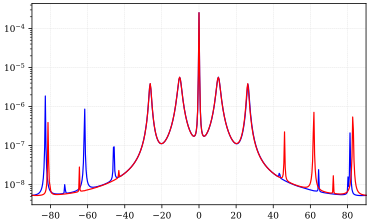

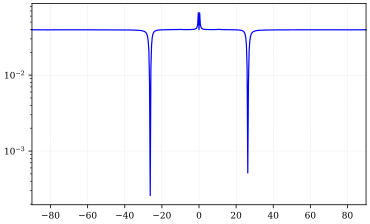

In [59]:
base.parse("""
# ===== Power detector =====

pd0 TMSX_DC nTMSX
pd0 TMSY_DC nTMSY
pd0 AS_DC nAS
xaxis* ETMX phi lin -90 90 500
put* ETMY phi $mx1

yaxis log abs

maxtem 3
""")

base.trace = 0
base.maxtem = 2
a = base.run()
print(a.rundata)

plt.figure(1)
plt.semilogy(a.x, a["TMSX_DC"])
plt.semilogy(a.x, a["TMSY_DC"])
plt.figure(2)
plt.semilogy(a.x, a["AS_DC"])


# Arm tuning is OFF, AS is not Dark


 
 computation time:  0.735596s



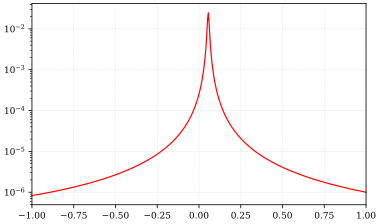

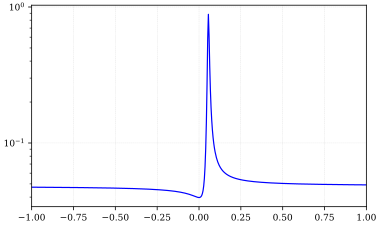

In [76]:
base.parse("""
# ===== Power detector =====

pd0 TMSX_DC nTMSX
pd0 TMSY_DC nTMSY
pd0 AS_DC nAS
xaxis* ETMX phi lin -1 1 500

yaxis log abs

maxtem 3
""")

base.trace = 0
base.maxtem = 2
a = base.run()
print(a.rundata)

plt.figure(1)
plt.semilogy(a.x, a["TMSX_DC"], c='red')
#plt.semilogy(a.x, a["TMSY_DC"])
plt.figure(2)
plt.semilogy(a.x, a["AS_DC"])


# Corss Check with Plane wave

In [77]:
plane = utl.model_DRFPMI()
plane.parse("""
pd0 TMSX_DC nTMSX
pd0 TMSY_DC nTMSY
pd0 AS_DC nAS
xaxis* ETMX phi lin -90 90 500
put* ETMY phi $mx1
""")


 
 computation time:  0.037749s



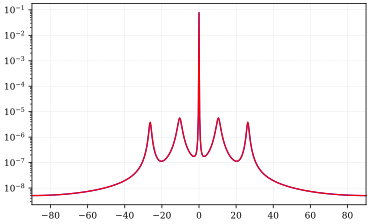

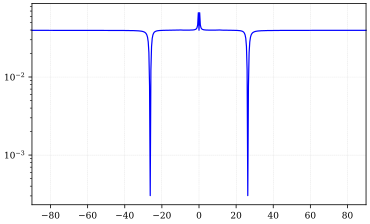

In [78]:
b = plane.run()
print(b.rundata)

plt.figure(1)
plt.semilogy(b.x, b["TMSX_DC"])
plt.semilogy(b.x, b["TMSY_DC"])
plt.figure(2)
plt.semilogy(b.x, b["AS_DC"])


In [79]:
plane = utl.model_DRFPMI()
plane.parse("""
# ===== Power detector =====
pd0 TMSX_DC nTMSX
pd0 TMSY_DC nTMSY
pd0 AS_DC nAS
xaxis* ETMX phi lin -1 1 500

yaxis log abs
""")


 
 computation time:  0.037689s



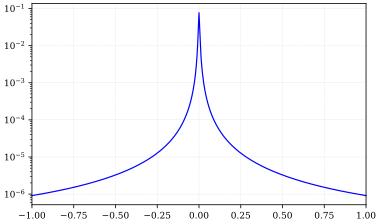

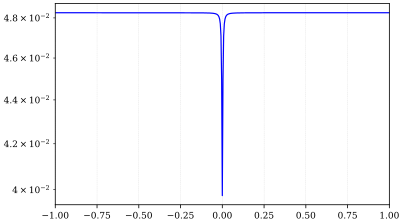

In [80]:

b = plane.run()
print(b.rundata)

plt.figure(1)
plt.semilogy(b.x, b["TMSX_DC"])
#plt.semilogy(b.x, b["TMSY_DC"])
plt.figure(2)
plt.semilogy(b.x, b["AS_DC"])
